# Group Activity, Week 16, Heather Leighton-Dick

## 1. Work to improve the model performance for the diabetes decision tree we created in class. You should be able to improve the precision and recall to be above .8 and .7 respectively. You can improve the preprocessing OR alter the model itself.

In [64]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus
import matplotlib.pyplot as plt
from IPython.display import Image

import itertools

diabetes_df = pd.read_csv("../Homework14/diabetes.csv")
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

oversample = SMOTE(random_state = 42)
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)


### I tried MachineLearning's combination over/under sampling technique with various floats, but precision and recall were both very negatively affected.

In [199]:
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)

#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
#X_resampled, y_resampled = pipeline.fit_resample(X, y)

### I tried various numbers in the max_features, min_samples_split, and class_weight parameters, with mixed results and none better than the combination below.

In [200]:
# decision tree classifier
#deep and complex trees tend to overfit, so we want to generalize and have
#reasonably simple trees as much as possible
model = tree.DecisionTreeClassifier(max_depth = 8, class_weight = {1:1}, random_state=42, min_samples_split=50, criterion='gini')

In [197]:
model = model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       150
           1       0.70      0.81      0.75        81

    accuracy                           0.81       231
   macro avg       0.80      0.81      0.80       231
weighted avg       0.82      0.81      0.82       231



In [192]:
%pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


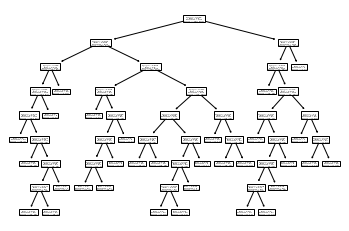

In [177]:
dot_data = tree.plot_tree(model)
plt.savefig("tree.svg")
plt.show()

## 2. Create a function that accepts an array of names and returns a string formatted as a list of names separated by commas EXCEPT for the last two names, which are separated by an ampersand (and sign - &)
Example input:
[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ] Example output:
Nichole, Tanisha & Maggie

In [112]:
#name_prs = [ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]

def name_list(d):
    names = ""
    
    for i in range(len(input_list)):
        if d != (len(input_list) - 1):
            names + str(d['name'])
        else:
            names + " & " + str(d['name'])

    print(names)

input_list = input("{'name': }")
#[d['name'] for d in name_prs]

{'name': }[ {'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'} ]


### This doesn't work but I feel like the strategy is sound...